In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# load and clean-up power usage data
from numpy import nan
from pandas import read_csv
# load all data
dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False,
infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())
# mark all missing values
dataset.replace('?', nan, inplace=True)
# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] +
values[:,6])
# save updated dataset
dataset.to_csv('household_power_consumption.csv')
# load the new dataset and summarize
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
print(dataset.head())

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Global_active_power')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.5, 0, 'Global_reactive_power')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.5, 0, 'Voltage')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.5, 0, 'Global_intensity')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.5, 0, 'Sub_metering_1')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.5, 0, 'Sub_metering_2')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.5, 0, 'Sub_metering_3')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.5, 0, 'sub_metering_4')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

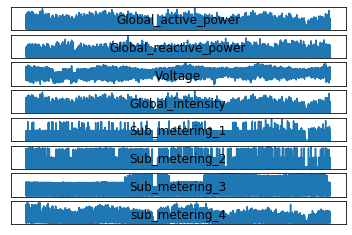

In [6]:
# line plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
    # create subplot
    pyplot.subplot(len(dataset.columns), 1, i+1)
    # get variable name
    name = dataset.columns[i]
    # plot data
    pyplot.plot(dataset[name])
    # set title
    pyplot.title(name, y=0)
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show() 

<Figure size 432x288 with 0 Axes>

Text(0.0, 0, '2007')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2008')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2009')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2010')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

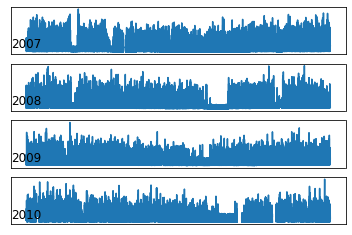

In [9]:
# yearly line plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure()

for i in range(len(years)):
    # prepare subplot
    ax = pyplot.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = dataset[str(year)]
    # plot the active power for the year
    pyplot.plot(result['Global_active_power'])
    # add a title to the subplot
    pyplot.title(str(year), y=0, loc='left')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

<Figure size 432x288 with 0 Axes>

Text(0.0, 0, '2007-1')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-2')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-3')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-4')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-5')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-6')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-7')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-8')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-9')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-10')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-11')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-12')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

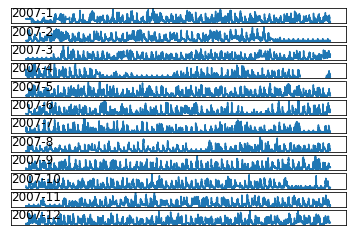

In [10]:
#closer look into 2007
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
    # prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2007-' + str(months[i])
    # get all observations for the month
    result = dataset[month]
    # plot the active power for the month
    pyplot.plot(result['Global_active_power'])
    # add a title to the subplot
    pyplot.title(month, y=0, loc='left')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

<Figure size 432x288 with 0 Axes>

Text(0.0, 0, '2007-01-1')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-2')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-3')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-4')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-5')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-6')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-7')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-8')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-9')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-10')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-11')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-12')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-13')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-14')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-15')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-16')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-17')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-18')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(0.0, 0, '2007-01-19')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

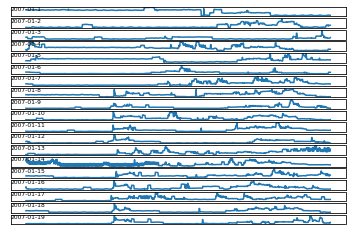

In [11]:
# daily line plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
days = [x for x in range(1, 20)]
pyplot.figure()
for i in range(len(days)):
    # prepare subplot
    ax = pyplot.subplot(len(days), 1, i+1)
    # determine the day to plot
    day = '2007-01-' + str(days[i])
    # get all observations for the day
    result = dataset[day]
    # plot the active power for the day
    pyplot.plot(result['Global_active_power'])
    # add a title to the subplot
    pyplot.title(day, y=0, loc='left', size=6)
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

<b> Time Series Data Distributions, plotting histograms to see distribution whether it's gausian or not

<Figure size 432x288 with 0 Axes>

Text(1.0, 0, 'Global_active_power')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(1.0, 0, 'Global_reactive_power')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(1.0, 0, 'Voltage')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(1.0, 0, 'Global_intensity')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(1.0, 0, 'Sub_metering_1')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(1.0, 0, 'Sub_metering_2')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(1.0, 0, 'Sub_metering_3')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

Text(1.0, 0, 'sub_metering_4')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

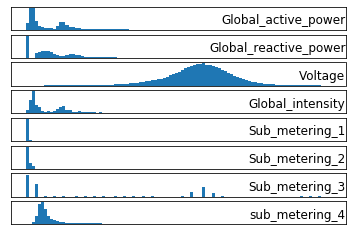

In [12]:
# histogram plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# histogram plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
    # create subplot
    pyplot.subplot(len(dataset.columns), 1, i+1)
    # get variable name
    name = dataset.columns[i]
    # create histogram
    dataset[name].hist(bins=100)
    # set title
    pyplot.title(name, y=0, loc='right')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

<b> The distribution of voltage data is strongly Gaussian, The distribution of active power appears to be bi-modal, meaning it looks like it has two
mean groups of observations.

<Figure size 432x288 with 0 Axes>

(0, 5)

Text(1.0, 0, '2007')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2008')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2009')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2010')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

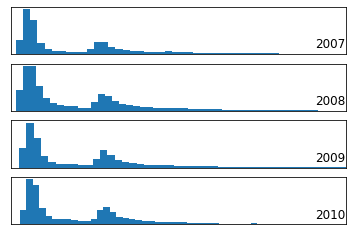

In [13]:
# yearly histogram plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
    # prepare subplot
    ax = pyplot.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = dataset[str(year)]
    # plot the active power for the year
    result['Global_active_power'].hist(bins=100)
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    # add a title to the subplot
    pyplot.title(str(year), y=0, loc='right')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

<Figure size 432x288 with 0 Axes>

(0, 5)

Text(1.0, 0, '2007-1')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-2')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-3')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-4')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-5')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-6')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-7')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-8')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-9')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-10')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-11')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

(0, 5)

Text(1.0, 0, '2007-12')

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

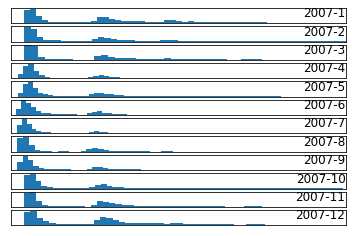

In [14]:
#monthly histogram plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
    # prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2007-' + str(months[i])
    # get all observations for the month
    result = dataset[month]
    # plot the active power for the month
    result['Global_active_power'].hist(bins=100)
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    # add a title to the subplot
    pyplot.title(month, y=0, loc='right')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

<b> We can see that the peaks are shifted down in the warmer northern
hemisphere months and shifted up for the colder months. We can also see a thicker or more
prominent tail toward larger kilowatt values for the cooler months of December through to
March.

<b> the most useful framing of the dataset is to forecast an interval of future active power
consumption.

<b> Develop Naive Models for Multi-step Energy Usage Forecasting <br>
Tomorrow will be the same as today. </br>
<br>Tomorrow will be the same as this day last year.</br>
<br>Tomorrow will be an average of the last few days.</br>

In [ ]:
# load and clean-up the power usage dataset
from numpy import nan
from numpy import isnan
from pandas import read_csv
# fill missing values with a value at the same time one day ago
def fill_missing(values):
one_day = 60 * 24